# The Question

- main questions: 
    - whether or not it’s beneficial to discount products?
    - how to define a pricing strategy in relation to discounts?
    
- detailled questions: 
    - How products should be classified into different categories in order to simplify reports and analysis.
    - What is the distribution of product prices across different categories.
    - How many products are being discounted.
    - How big are the offered discounts as a percentage of the product prices.
    - How seasonality and special dates (Christmas, Black Friday) affect sales.
    - How could data collection be improved.
    - A critical question, hence, is whether revenue grows whenever discounts increase.

- also:
    - How many orders are there?
    - How many products are there?
    - What period of time do these orders comprise?
    - How many orders are Completed?
    - How should revenue be computed?
    - What is the overall revenue for that time?
    - Are there seasonal patterns in the evolution of sales?
    - What are the most sold products?
    - What are the products that generate the most revenue?


## Data columns explained

    orders.csv – Every row in this file represents an order.
        order_id – a unique identifier for each order
        created_date – a timestamp for when the order was created
        total_paid – the total amount paid by the customer for 
        this order, in euros
        state 
            “Shopping basket” – products have been placed to the 
                shopping basket, but the order has not been processed yet.
            “Pending” – the shopping basket has been processed, 
                but payment confirmation is pending.
            “Completed” – the order has been placed and payed, the 
                transaction is completed.
            “Cancelled” – the order has been cancelled and the 
                payment returned to the customer.
    orderlines.csv – Every row represents each one of the different products involved in an order.
        id – a unique identifier for each row in this file
        id_order – corresponds to orders.order_id
        product_id – an old identifier for each product, nowadays 
        not in use
        product_quantity – how many units of that products were 
        purchased on that order
        sku – stock keeping unit: a unique identifier for each 
        product
        unit_price – the unitary price (in euros) of each product 
        at the moment of placing that order
        date – timestamp for the processing of that product
    products.csv
        sku – stock keeping unit: a unique identifier for each product
        name – product name
        desc – product description
        in_stock – whether or not the product was in stock at the 
        moment of the data extraction
        type – a numerical code for product type
    brands.csv
        short – the 3 character code by which the brand can be 
        identified in the first 3 characters of products.sku
        long – brand name


  
    products.price –> this is the original price of a product, 
          without applying any discount or promotion.
    orderlines.unit_price –> this is the actual price at which a 
          product has been sold. It should roughly match with the 
          price in the products table, but there might be 
          deviations, as discounts get applied here.
    orders.total_paid –> this is the total amount of the full 
          order. It should roughly translate to the sum of all 
          unitary prices, multiplied by the amount of each product
           purchased (orderlines.product_quantity). The key word 
           here is, again, roughly: the total amount of the order 
           might include shipping costs or vouchers.



## Load and Clean 


In [1]:
#data
def load_raw_data():
    import pandas as pd

    brands_url = 'https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=sharing' #brands.csv
    orderlines_url = 'https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing' #orderlines.csv
    orders_url = 'https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=sharing' #orders.csv
    products_url = 'https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=sharing' # products.csv

    edb = {'brands': brands_url,              # eniac_database
                'orderlines': orderlines_url, 
                'orders': orders_url, 
                'products': products_url}

    def url_to_df(url):
      path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
      return pd.read_csv(path)

    #load data
    for k,v in edb.items():
      edb[k] = url_to_df(v)
    
    return edb

def load_clean_data():
    pass

In [2]:
# installs notebook importer and imports it
# is needed to import functions from other notebooks
%pip install nbimporter
import nbimporter

Note: you may need to restart the kernel to use updated packages.


Das System kann den angegebenen Pfad nicht finden.


In [7]:
def load_clean_data(path = './data/'):
    import pandas as pd
    
    brands = pd.read_csv(path + 'brands_cl.csv')
    products = pd.read_csv(path + 'products_cl.csv')
    orders = pd.read_csv(path + 'orders_cl.csv')
    orderlines = pd.read_csv(path + 'orderlines_cl.csv')
    return {'products': products,
                   'orders': orders,
                   'orderlines': orderlines, 
                   'brands': brands}

ebd = load_clean_data() #eniac data base

# Business Questions

## Product Categories

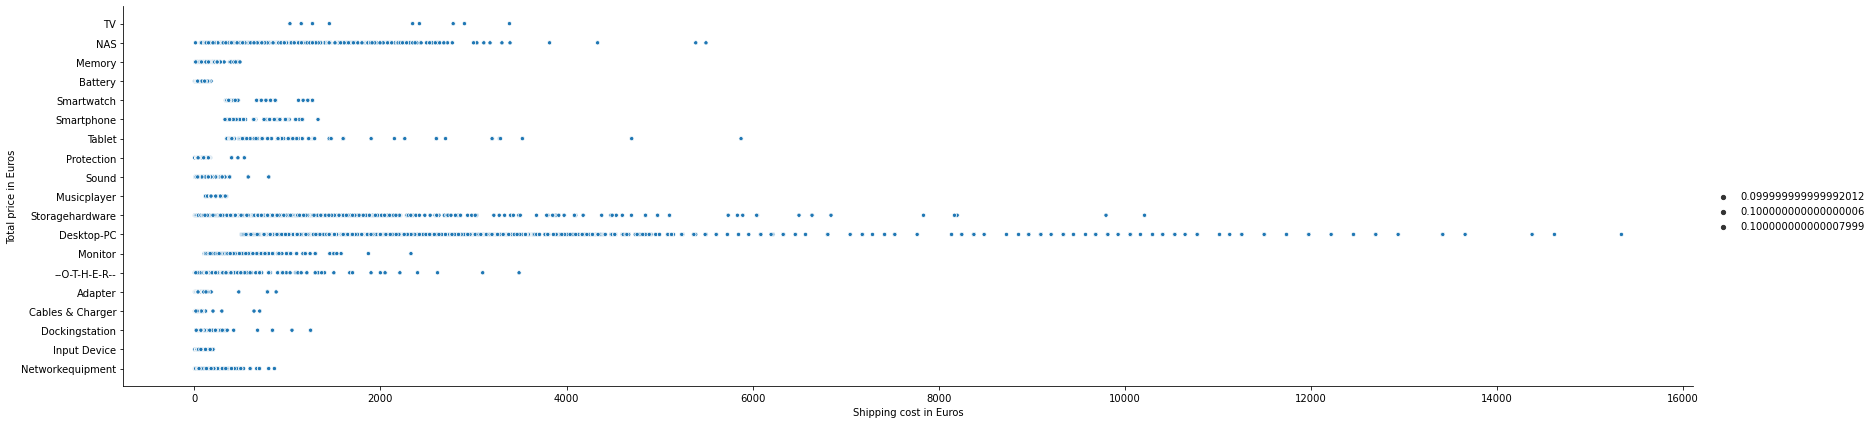

In [9]:
import sys
sys.path.append("..")
from src.DSBC_proj2_data_cleaning import *

# passing a dict as argument to functions while only changing the values inside the dict
# allows for passing by reference in python as long as the passed dict is not directly
# assigned to (no ebd = ...)
# passing by reference allows to pass, change (i.e. clean) and return the dataframes without
# burdening the readability of the code by making it explicit 
further_clean_data(ebd) 
categorise_products(ebd) 


sns.relplot(x="price",
                y="product_category",
                size=0.1,
                height= 6,
                aspect = 4.0,
                data=ebd['products'][['product_category','price']])

plt.xlabel('Shipping cost in Euros')
plt.ylabel('Total price in Euros')
sns.despine()

In [8]:
#count distribution of product prices
import sys
sys.path.append("..")
from src.DSBC_proj2_prices import distribution_prices


In [6]:
#....